# MIE1613 Simulation Project: results and figures for section 1 of report results
this file develops the figures, tables, results using in section one in a clean format for reuse and editing.

In [25]:
# Import Libraries
# Data
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import random

import re
from copy import deepcopy
#from tqdm import tqdm
import tqdm.notebook as tq

#Viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(font='Helvetica') # Futura? Calibri Light? 
sns.set_style("white")
sns.set_theme(style='ticks')
sns.set_context('talk')

## Import
import results data for the 2023-2050 chains

In [26]:
# Importing the cumulative mean data
emit_sum_outputs_opti = {'min':{},'likely':{},'max':{}}
for i in ['min','likely','max']:
    emit_sum_outputs_opti[i]['low_growth'] = np.genfromtxt('2023_2050_chains/optimistic/lg_403030_'+i+'_200r.csv', delimiter=',')
    emit_sum_outputs_opti[i]['mid_growth'] = np.genfromtxt('2023_2050_chains/optimistic/mg_403030_'+i+'_200r.csv', delimiter=',')
    emit_sum_outputs_opti[i]['high_growth'] = np.genfromtxt('2023_2050_chains/optimistic/hg_403030_'+i+'_200r.csv', delimiter=',')

emit_sum_outputs_pessi = {'min':{},'likely':{},'max':{}}
for i in ['min','likely','max']:
    emit_sum_outputs_pessi[i]['low_growth'] = np.genfromtxt('2023_2050_chains/conservative/lg_403030_'+i+'_conserv_300r.csv', delimiter=',')
    emit_sum_outputs_pessi[i]['mid_growth'] = np.genfromtxt('2023_2050_chains/conservative/mg_403030_'+i+'_conserv_300r.csv', delimiter=',')
    emit_sum_outputs_pessi[i]['high_growth'] = np.genfromtxt('2023_2050_chains/conservative/hg_403030_'+i+'_conserv_300r.csv', delimiter=',')


# Importing the embodied vs. operational data for the 'Likely' emission factor scenario



# Importing the dataframes to recreate the combined sample path figure
figure_optimistic = pd.read_csv('2023_2050_chains/chain_figure_likely_opti.csv', index_col=0)
figure_conservative = pd.read_csv('2023_2050_chains/chain_figure_likely_conserve.csv', index_col=0)

## Recreating the figure with both scenarios on it

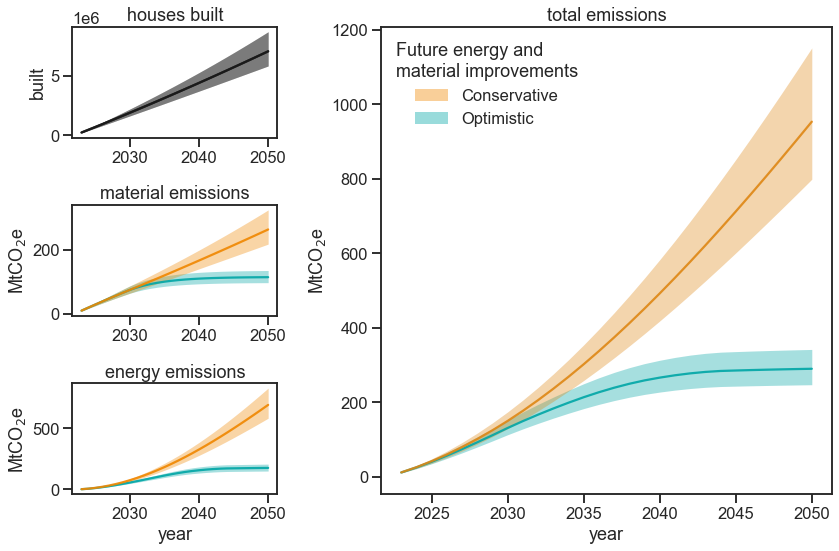

In [34]:
# Setup the figure and gridspec
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(3, 2, figure=fig, width_ratios=[1,2.2])

# Add subplots
ax1 = fig.add_subplot(gs[0, 0]) # First row, first column
ax2 = fig.add_subplot(gs[1, 0]) # Second row, first column
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[:, 1]) # Both rows, second column
axs = [ax1,ax2,ax3,ax4]

#clrs = [['k','salmon','steelblue','purple'],['k','r','b','darkviolet']]
#clrs = [['k','#5ec962','#5ec962','#5ec962'],['k','#440154','#440154','#440154']]
#clrs = [['k','#2077B7','#2077B7','#2077B7'],['k','#D53838','#D53838','#D53838']]
clrs = [['k','#00A6A6','#00A6A6','#00A6A6'],['k','#F08700','#F08700','#DE8714']]

years = np.arange(2023, 2051)

for j, scenar in enumerate([figure_optimistic, figure_conservative]):
    for en, i in enumerate([0,3,6,9]):
        minr = scenar.iloc[:,i].cumsum()
        maxr = scenar.iloc[:,i+1].cumsum()
        meanr = scenar.iloc[:,i+2].cumsum()

        #print(j,en)
        axs[en].fill_between(years, minr, maxr, color=clrs[j][en], alpha=0.35, linewidth=0)


        axs[en].plot(years, meanr, color=clrs[j][en], alpha=0.9)

y_lims = [[180000,400000],[-0.7,50], [-0.7,50], [-1,70]]
titles = ['houses built','material emissions','energy emissions','total emissions']
labs = ['built','MtCO$_2$e','MtCO$_2$e','MtCO$_2$e']
for en, a in enumerate(axs):
    #a.set_ylim(y_lims[en])
    #a.hlines(0, 2020, 2055)
    a.set_xlabel('')
    if en >=2:
        a.set_xlabel('year')
    a.set_ylabel(labs[en])
    a.set_title(titles[en])

# legend
blue_patch = mpatches.Patch(color=clrs[0][1], label='Optimistic', alpha=0.4, linewidth=0)
red_patch = mpatches.Patch(color=clrs[1][1], label='Conservative', alpha=0.4, linewidth=0)
ax4.legend(title='Future energy and \nmaterial improvements', 
           handles=[red_patch, blue_patch], frameon=False, loc='upper left')
plt.tight_layout()
#plt.savefig('2023_2050_chain_CUMSUM_results.png', bbox_inches='tight')

In [5]:
figure_conservative

,built_lowest,built_highest,built_mean,embodied_lowest,embodied_highest,embodied_mean,operational_lowest,operational_highest,operational_mean,sum_lowest,sum_highest,sum_mean
2023,199670.0,261976.0,229192.065556,8.506309,11.168271,9.770508,1.936507,2.540776,2.222826,10.442816,13.709047,11.993334
2024,200676.0,265716.0,231192.932222,8.399461,11.101984,9.657995,3.822314,5.038149,4.395543,12.221775,16.140133,14.053537
2025,201637.0,269400.0,233140.326667,8.253852,11.022509,9.540105,5.656563,7.489904,6.516743,13.910415,18.512414,16.056848
2026,202470.0,273010.0,234997.373333,8.106567,10.933576,9.414850,7.437619,9.893683,8.584708,15.544186,20.827259,17.999559
2027,203209.0,276536.0,236774.905556,7.963983,10.844021,9.284455,9.164242,12.247077,10.597874,17.128225,23.091098,19.882329
2028,203883.0,279980.0,238489.455556,7.824934,10.745601,9.147515,10.835535,14.547772,12.554873,18.660470,25.293373,21.702388
2029,204507.0,283344.0,240145.747778,7.668519,10.627544,9.005596,12.450753,16.793503,14.454416,20.119273,27.421047,23.460012
2030,205084.0,286647.0,241749.275556,7.519728,10.511496,8.859261,14.009204,18.982209,16.295296,21.528931,29.493705,25.154558
2031,205620.0,289916.0,243307.642222,7.541736,10.635598,8.917015,15.510267,21.112098,18.076404,23.052002,31.747696,26.993419
2032,206120.0,293180.0,244830.312222,7.551674,10.736947,8.972595,16.953405,23.181665,19.796736,24.505080,33.918612,28.769331


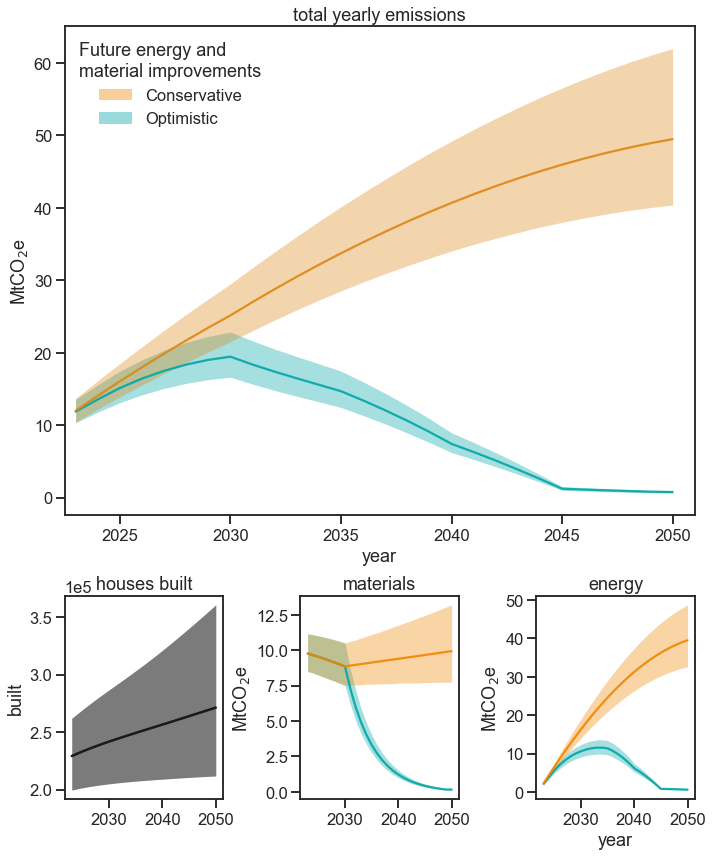

In [6]:
# Setup the figure and gridspec
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(2, 3, figure=fig, 
                       #width_ratios=[1,2.2]
                       height_ratios=[2.4,1]
                       )

# Add subplots
ax1 = fig.add_subplot(gs[1, 0]) # First row, first column
ax2 = fig.add_subplot(gs[1, 1]) # Second row, first column
ax3 = fig.add_subplot(gs[1, 2])
ax4 = fig.add_subplot(gs[0, :]) # Both rows, second column
axs = [ax1,ax2,ax3,ax4]

#clrs = [['k','salmon','steelblue','purple'],['k','r','b','darkviolet']]
#clrs = [['k','#5ec962','#5ec962','#5ec962'],['k','#440154','#440154','#440154']]
#clrs = [['k','#2077B7','#2077B7','#2077B7'],['k','#D53838','#D53838','#D53838']]
clrs = [['k','#00A6A6','#00A6A6','#00A6A6'],['k','#F08700','#F08700','#DE8714']]

years = np.arange(2023, 2051)

for j, scenar in enumerate([figure_optimistic, figure_conservative]):
    for en, i in enumerate([0,3,6,9]):
        minr = scenar.iloc[:,i]
        maxr = scenar.iloc[:,i+1]
        meanr = scenar.iloc[:,i+2]

        #print(j,en)
        axs[en].fill_between(years, minr, maxr, color=clrs[j][en], alpha=0.35, linewidth=0)


        axs[en].plot(years, meanr, color=clrs[j][en], alpha=0.9)

y_lims = [[180000,400000],[-0.7,50], [-0.7,50], [-1,70]]
titles = ['houses built','materials','energy','total yearly emissions']
labs = ['built','MtCO$_2$e','MtCO$_2$e','MtCO$_2$e']
for en, a in enumerate(axs):
    #a.set_ylim(y_lims[en])
    #a.hlines(0, 2020, 2055)
    a.set_xlabel('')
    if en >=2:
        a.set_xlabel('year')
    a.set_ylabel(labs[en])
    a.set_title(titles[en])

ax4.set_xlim([2022.5,2051])
ax1.ticklabel_format(axis='y', scilimits=[-3, 3])

# legend
blue_patch = mpatches.Patch(color=clrs[0][1], label='Optimistic', alpha=0.4, linewidth=0)
red_patch = mpatches.Patch(color=clrs[1][1], label='Conservative', alpha=0.4, linewidth=0)
ax4.legend(title='Future energy and \nmaterial improvements', 
           handles=[red_patch, blue_patch], frameon=False, loc='upper left')
plt.tight_layout()
#plt.savefig('2023_2050_chain_results_vert.png', bbox_inches='tight')

## Comparison plot/table of different sensitive variables

In [7]:
replications = 300
for factor in ['min','likely','max']:
    print(factor)
    print('95% CI for mean cumulative emissions - LOW GROWTH:', np.mean(emit_sum_outputs_opti[factor]['low_growth']), "+/-",
       1.96*np.std(emit_sum_outputs_opti[factor]['low_growth'], ddof = 1)/np.sqrt(replications))
    
    print('95% CI for mean cumulative emissions - MEDIUM GROWTH:', np.mean(emit_sum_outputs_opti[factor]['mid_growth']), "+/-",
       1.96*np.std(emit_sum_outputs_opti[factor]['mid_growth'], ddof = 1)/np.sqrt(replications))
    
    print('95% CI for mean cumulative emissions - HIGH GROWTH:', np.mean(emit_sum_outputs_opti[factor]['high_growth']), "+/-",
       1.96*np.std(emit_sum_outputs_opti[factor]['high_growth'], ddof = 1)/np.sqrt(replications))

min
95% CI for mean cumulative emissions - LOW GROWTH: 246.47986758299118 +/- 1.1816578128850048
95% CI for mean cumulative emissions - MEDIUM GROWTH: 252.25516988890467 +/- 1.2794297186967054
95% CI for mean cumulative emissions - HIGH GROWTH: 256.9175240121918 +/- 1.359684209368094
likely
95% CI for mean cumulative emissions - LOW GROWTH: 283.96708796702455 +/- 1.3623104374442596
95% CI for mean cumulative emissions - MEDIUM GROWTH: 290.6848894591736 +/- 1.4760447985194303
95% CI for mean cumulative emissions - HIGH GROWTH: 296.1041531041049 +/- 1.5694345342533005
max
95% CI for mean cumulative emissions - LOW GROWTH: 323.7191476939894 +/- 1.5539220627910473
95% CI for mean cumulative emissions - MEDIUM GROWTH: 331.43944243833965 +/- 1.6846513776719925
95% CI for mean cumulative emissions - HIGH GROWTH: 337.66449827093686 +/- 1.7920114908023013


In [8]:
replications = 300
for factor in ['min','likely','max']:
    print(factor)
    print('95% CI for mean cumulative emissions - LOW GROWTH:', np.mean(emit_sum_outputs_pessi[factor]['low_growth']), "+/-",
       1.96*np.std(emit_sum_outputs_pessi[factor]['low_growth'], ddof = 1)/np.sqrt(replications))
    
    print('95% CI for mean cumulative emissions - MEDIUM GROWTH:', np.mean(emit_sum_outputs_pessi[factor]['mid_growth']), "+/-",
       1.96*np.std(emit_sum_outputs_pessi[factor]['mid_growth'], ddof = 1)/np.sqrt(replications))
    
    print('95% CI for mean cumulative emissions - HIGH GROWTH:', np.mean(emit_sum_outputs_pessi[factor]['high_growth']), "+/-",
       1.96*np.std(emit_sum_outputs_pessi[factor]['high_growth'], ddof = 1)/np.sqrt(replications))

min
95% CI for mean cumulative emissions - LOW GROWTH: 832.6107178594436 +/- 4.099461346479874
95% CI for mean cumulative emissions - MEDIUM GROWTH: 864.1430479306391 +/- 4.640517999323059
95% CI for mean cumulative emissions - HIGH GROWTH: 891.9957156562813 +/- 5.128732860055501
likely
95% CI for mean cumulative emissions - LOW GROWTH: 918.7536085814694 +/- 4.533375716750564
95% CI for mean cumulative emissions - MEDIUM GROWTH: 954.7594692985089 +/- 5.151753902168355
95% CI for mean cumulative emissions - HIGH GROWTH: 986.8714363452385 +/- 5.715531480170573
max
95% CI for mean cumulative emissions - LOW GROWTH: 1012.005445652509 +/- 5.003450970181801
95% CI for mean cumulative emissions - MEDIUM GROWTH: 1052.887625318135 +/- 5.706150466602432
95% CI for mean cumulative emissions - HIGH GROWTH: 1089.6436351018338 +/- 6.352352385429135


difference

In [24]:
# E[yo-y1], S_D
for factor in ['min','likely','max']:
    # store results in list
    conservatives = [emit_sum_outputs_pessi[factor]['low_growth'], emit_sum_outputs_pessi[factor]['mid_growth'], emit_sum_outputs_pessi[factor]['high_growth']]
    optimistics = [emit_sum_outputs_opti[factor]['low_growth'], emit_sum_outputs_opti[factor]['mid_growth'], emit_sum_outputs_opti[factor]['high_growth']]

    for i, growth in enumerate(['low_growth','mid_growth','high_growth']):
        D_i = conservatives[i] - optimistics[i]
        D_bar = np.mean(D_i)
        
        print(factor, D_bar, '+-', 1.96*np.std(D_i, ddof = 1)/np.sqrt(replications))

min 586.1308502764524 +- 2.918106054611136
min 611.8878780417344 +- 3.362288398661144
min 635.0781916440894 +- 3.77132087944305
likely 634.7865206144448 +- 3.171459408701864
likely 664.0745798393355 +- 3.677286503501326
likely 690.7672832411336 +- 4.1491032587741685
max 688.2862979585198 +- 3.4500296912234245
max 721.448182879795 +- 4.0235148094610445
max 751.9791368308969 +- 4.564199216046534


showing all scenarios

In [234]:
# put data in dataframe
# opti
min_df_opti = pd.DataFrame(emit_sum_outputs_opti['min'])
min_df_opti['factor'] = 'min'
likely_df_opti = pd.DataFrame(emit_sum_outputs_opti['likely'])
likely_df_opti['factor'] = 'likely'
max_df_opti = pd.DataFrame(emit_sum_outputs_opti['max'])
max_df_opti['factor'] = 'max'

cum_df_opti = pd.concat([min_df_opti,likely_df_opti,max_df_opti])

# pessi
min_df_pessi = pd.DataFrame(emit_sum_outputs_pessi['min'])
min_df_pessi['factor'] = 'min'
likely_df_pessi = pd.DataFrame(emit_sum_outputs_pessi['likely'])
likely_df_pessi['factor'] = 'likely'
max_df_pessi = pd.DataFrame(emit_sum_outputs_pessi['max'])
max_df_pessi['factor'] = 'max'

cum_df_pessi = pd.concat([min_df_pessi,likely_df_pessi,max_df_pessi])


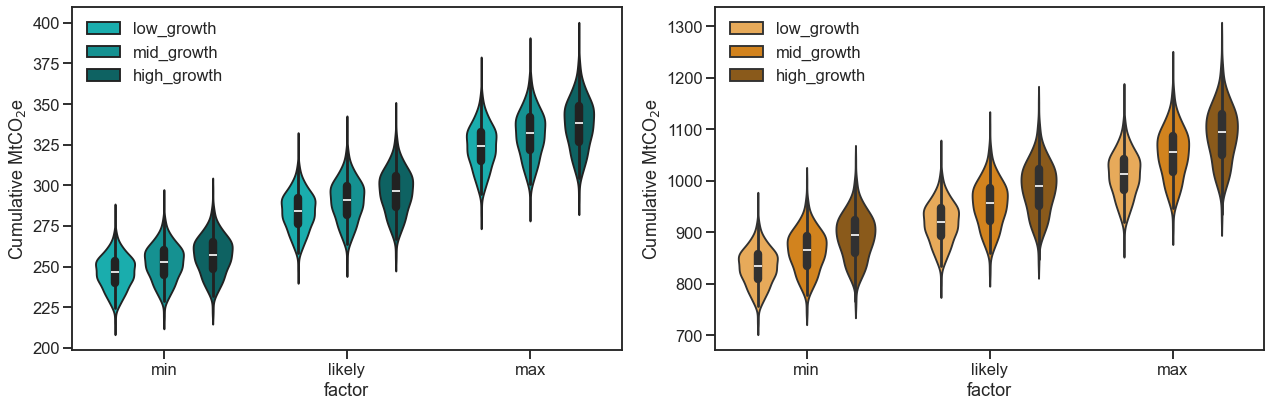

In [263]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

p = ['#02C5C5','#00A6A6','#007070']
sns.violinplot(ax=ax[0], data=cum_df_opti.melt(id_vars=['factor']), x='factor', y='value', hue='variable',
            palette=p, gap=.2,
            #whis=[5, 95] #color='#00A6A6'
            )

p2 = ['#FFAD42','#F08700','#9C5C08']
sns.violinplot(ax=ax[1], data=cum_df_pessi.melt(id_vars=['factor']), x='factor', y='value', hue='variable',
            palette=p2, gap=.2,
            inner='box',
            #whis=[5, 95] #color='#00A6A6'
            )

for a in ax.reshape(-1):
    a.set_ylabel('Cumulative MtCO$_2$e')
    a.legend(frameon=False)

plt.tight_layout()
#plt.savefig('cumulative_chain_results_violin.png', bbox_inches='tight')

<Axes: ylabel='Count'>

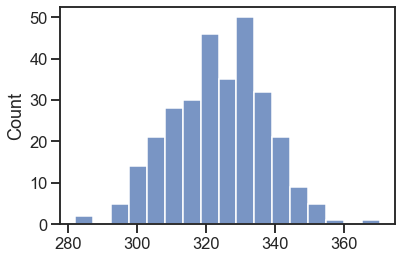

In [149]:
sns.histplot(emit_sum_outputs_opti[factor]['low_growth'])

## Expected cumulative emissions
give the expected cumulative emissions